In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [13]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [15]:
# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode categorical data
df['Gender_encoded'] = encoder.fit_transform(df['Gender'])

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [16]:
# check for missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
Gender_encoded     0
dtype: int64

In [20]:
# prepare data
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [21]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [22]:
# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[ 0.67919264,  1.7759516 ],
       [ 2.01844574,  0.36940233],
       [-1.80799168, -1.33017804],
       [-0.08609484, -0.24596298],
       [ 0.58353171, -0.9199345 ]])

In [23]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [25]:
preds = model.predict(X_test)

# evaluate model
print("Accuracy: ", accuracy_score(y_test, preds))
print("Confusion Matrix: \n", confusion_matrix(y_test, preds))
print("Classification Report: \n", classification_report(y_test, preds))

Accuracy:  0.95
Confusion Matrix: 
 [[51  3]
 [ 1 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.89      0.96      0.93        26

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



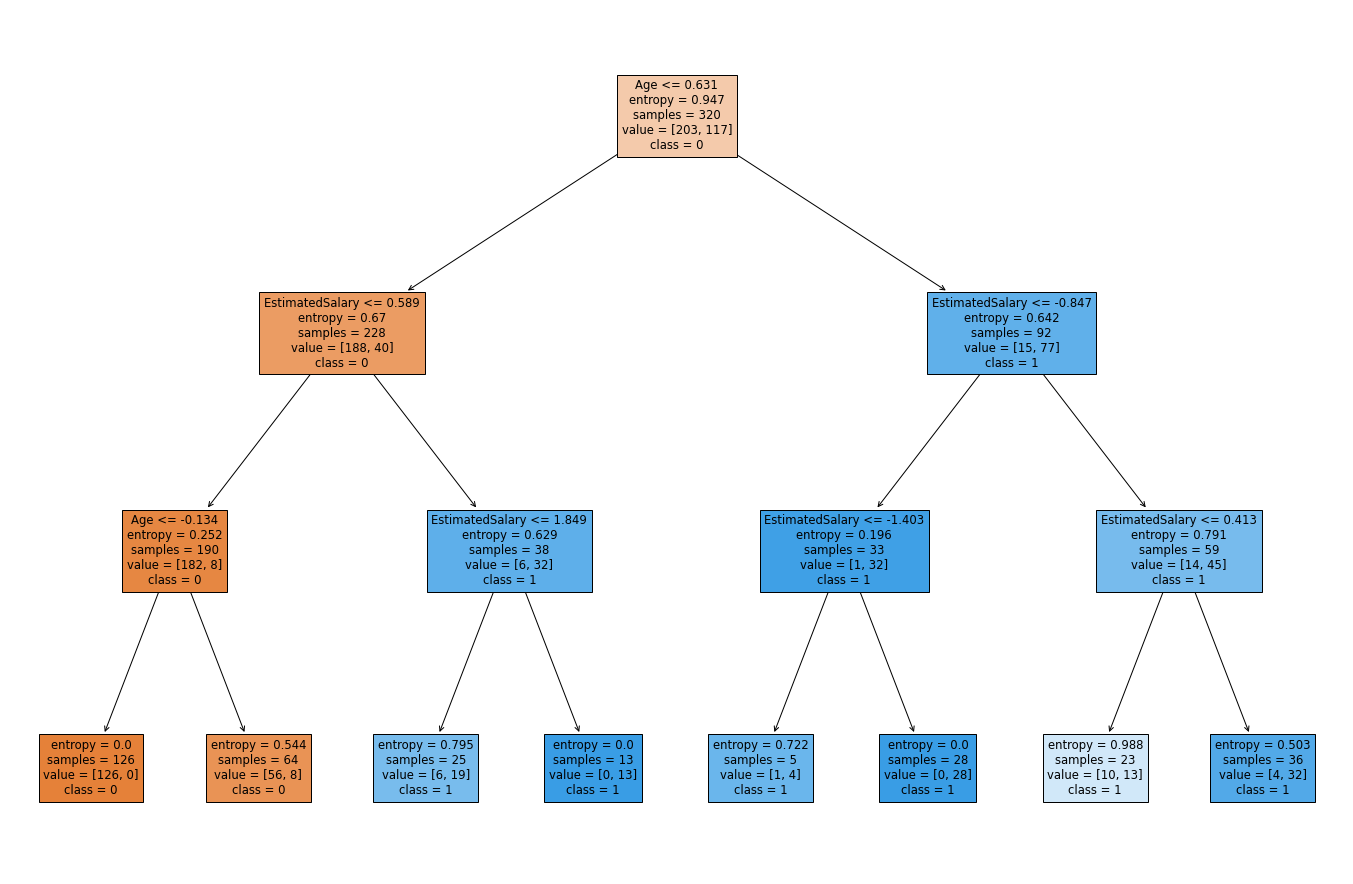

In [35]:
# Visualization
plt.figure(figsize=(24, 16))
plot_tree(model, feature_names=['Age', 'EstimatedSalary'], class_names=['0', '1'], filled=True)
plt.show()